# Simple EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print('train 데이터의 columns :', list(train.columns))
print('test 데이터의 columns', list(test.columns))

train 데이터의 columns : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
test 데이터의 columns ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
# null값 확인
print('Check null value of train')
print(train.isnull().sum())
print('='*30)
print('Check null value of test')
print(test.isnull().sum())

Check null value of train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Check null value of test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


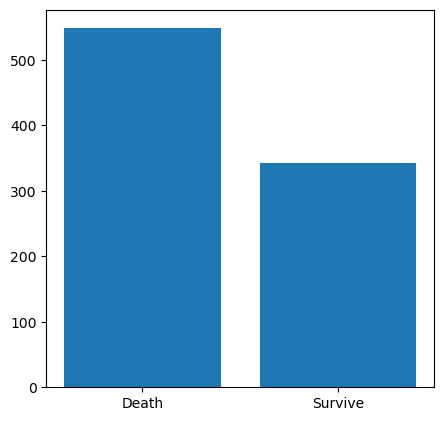

In [8]:
# label의 분포 확인
plt.figure(figsize = (5,5), dpi = 100)
plt.bar(['Death','Survive'], train['Survived'].value_counts().sort_index())
plt.show()

In [9]:
train_x = train.drop(['Survived', 'PassengerId'], axis = 1)
test = test.drop(['PassengerId'], axis = 1)
train_y = train['Survived']

# EDA

In [10]:
feature = list(train_x.columns)
feature.remove('Ticket')
feature.remove('Name')
feature.remove('Cabin')

In [11]:
feature

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

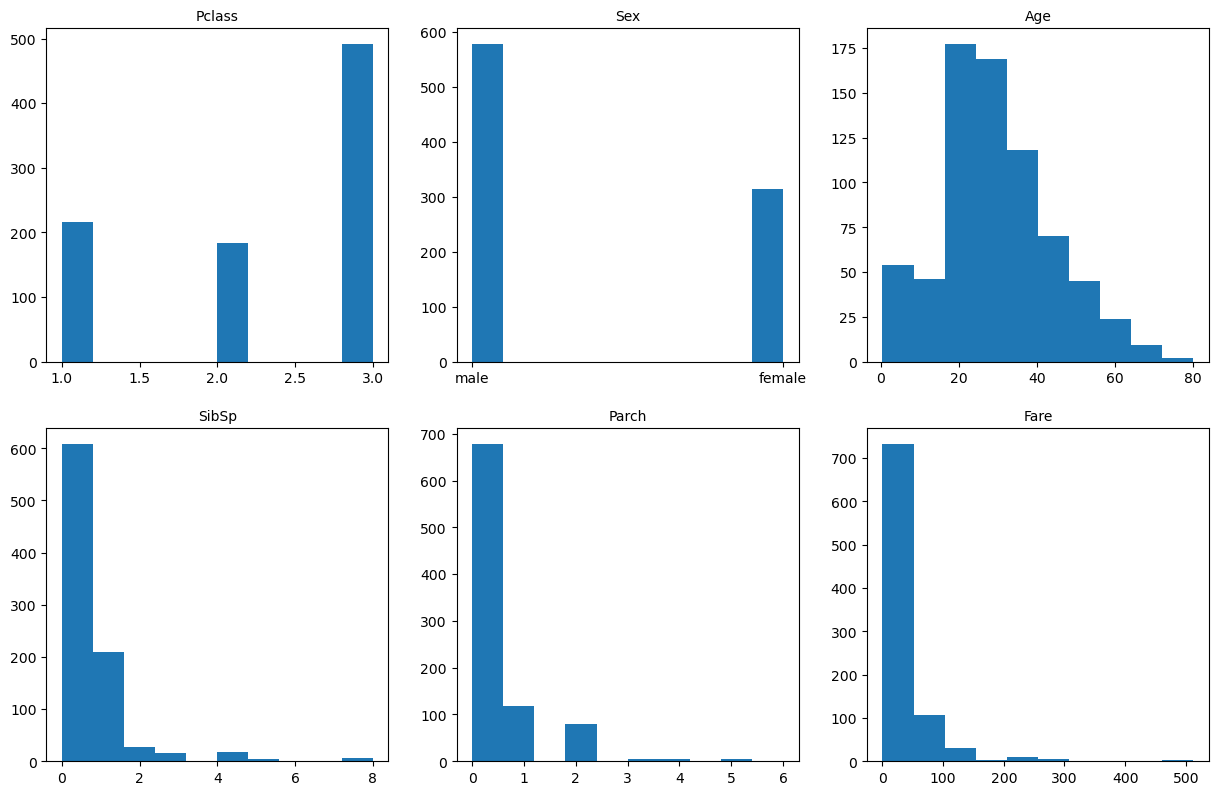

In [12]:
plt.figure(figsize = (15,15), dpi = 100)
for i, col in enumerate(feature[:-1]):
    plt.subplot(3, 3, i+1)
    plt.hist(train_x[col])
    plt.title(col, fontsize = 10)
plt.show()

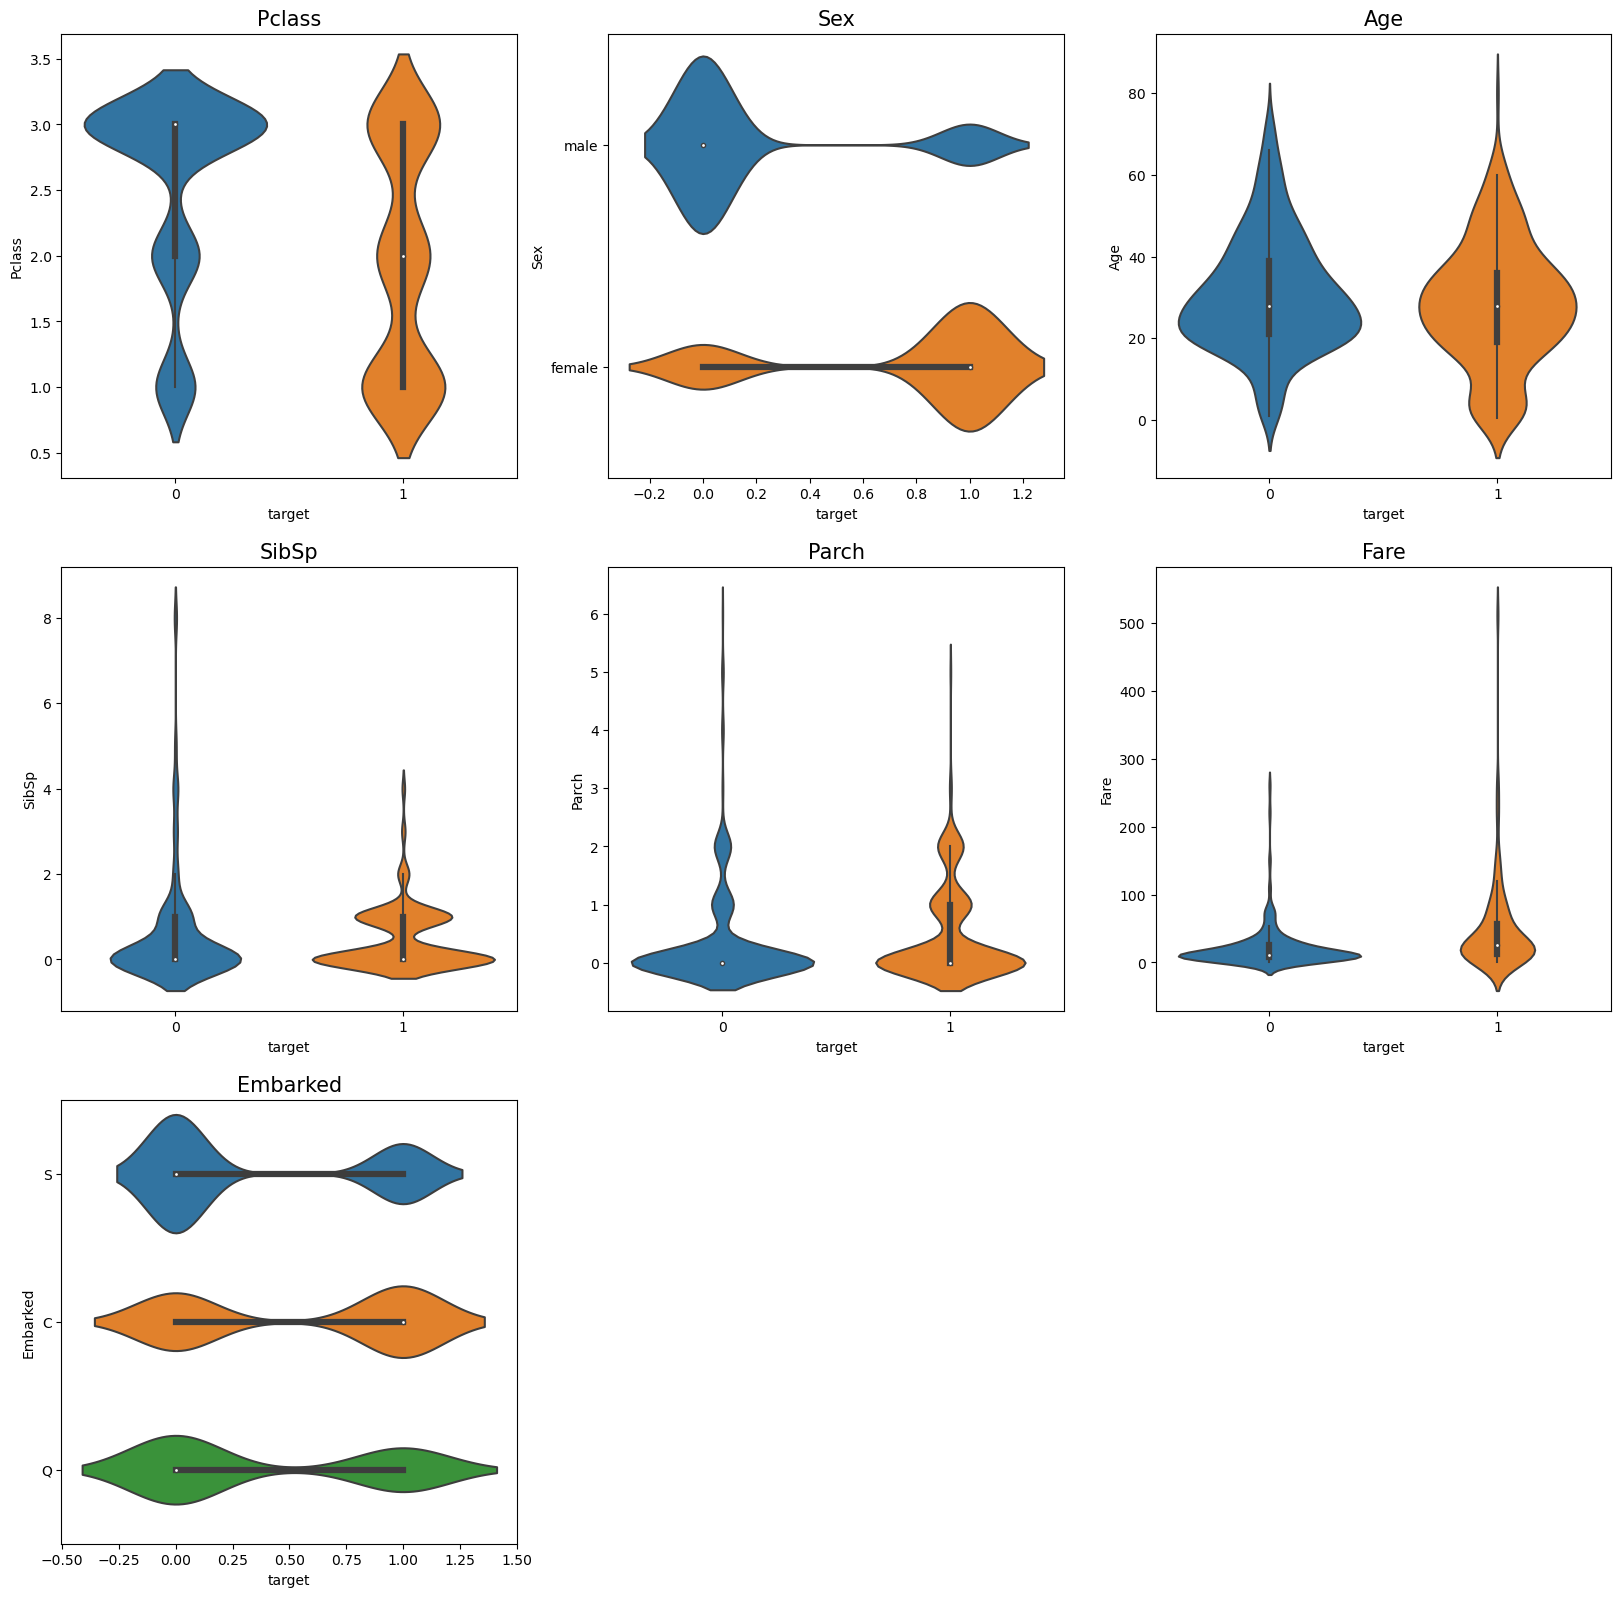

In [13]:
plt.figure(figsize = (20,20), dpi = 100)
for i, col in enumerate(feature):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x = train_y, y = train_x[col])
    plt.xlabel('target', fontsize = 10)
    plt.ylabel(col, fontsize = 10)
    plt.title(col, fontsize = 15)
plt.show()

In [14]:
train_x.skew()

Pclass   -0.630548
Age       0.389108
SibSp     3.695352
Parch     2.749117
Fare      4.787317
dtype: float64

# Preprocessing

In [15]:
# train set 전처리

train_x['Sex'] = train_x['Sex'].map({'male':0, 'female':1}) # 남자는 0, 여자는 1로 맵핑

train_x['n_of_family'] = train_x['SibSp'] + train_x['Parch'] # 동행자수를 합한 새로운 피쳐 생성

# 혼자 탑승한 사람 수를 새로운 피쳐로 생성
train_x['Alone'] = 0 
for i in range(0, len(train_x)):
    if train_x['n_of_family'][i] > 0:
        train_x['Alone'][i] = 0
    else:
        train_x['Alone'][i] = 1

# Name 피쳐에서 호칭에 따라 인코딩
for i in range(0, len(train_x)):
    if train_x['Name'][i].find('Mr.') != -1:
        train_x['Name'][i] = 'mr'
    elif train_x['Name'][i].find('Mrs.') != -1:
        train_x['Name'][i] = 'mrs'
    elif train_x['Name'][i].find('Miss.') != -1:
        train_x['Name'][i] = 'miss'
    elif train_x['Name'][i].find('Ms.') != -1:
        train_x['Name'][i] = 'miss'
    else:
        train_x['Name'][i] = 'other'

# Cabin 피쳐는 결측값이 너무 많으므로 해당 열을 삭제
# Ticket 피쳐는 예측 성능에 영향을 주지 않을 것으로 생각되어 삭제
train_x = train_x.drop(['Ticket', 'Cabin'], axis = 1) # Ticket과 Cabin 피쳐 삭제

In [16]:
# test set 전처리

test['Sex'] = test['Sex'].map({'male':0, 'female':1})

test['n_of_family'] = test['SibSp'] + test['Parch']

test['Alone'] = 0
for i in range(0, len(test)):
    if test['n_of_family'][i] > 0:
        test['Alone'][i] = 0
    else:
        test['Alone'][i] = 1

for i in range(0, len(test)):
    if test['Name'][i].find('Mr.') != -1:
        test['Name'][i] = 'mr'
    elif test['Name'][i].find('Mrs.') != -1:
        test['Name'][i] = 'mrs'
    elif test['Name'][i].find('Miss.') != -1:
        test['Name'][i] = 'miss'
    elif test['Name'][i].find('Ms.') != -1:
        test['Name'][i] = 'miss'
    else:
        test['Name'][i] = 'other'

test = test.drop(['Ticket', 'Cabin'], axis = 1)

# Missing values

In [17]:
print(train_x.isnull().sum())
print('='*20)
print(test.isnull().sum())

Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
n_of_family      0
Alone            0
dtype: int64
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
n_of_family     0
Alone           0
dtype: int64


In [18]:
# train set의 Embarked 피쳐의 유일값 개수
train_x['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
# EMbarked 피쳐의 경우 결측값이 2개만 존재
# 최빈값 정도로 채워주는 것이 적당하다.
# Embarked의 경우 0이 최빈값
train_x['Embarked'] = train_x['Embarked'].fillna('S')

In [20]:
# test set의 fare피쳐의 경우 결측값이 1개 밖에 없다.
# 무시해도 좋은 수준이기 때문에 train set의 median으로 대체해 준다.
test['Fare'] = test['Fare'].fillna(train_x['Fare'].median())

In [21]:
# 호칭별 나이의 평균값
grouped_by_name = train_x['Age'].groupby(train_x['Name'])
grouped_by_name.mean()

Name
miss     21.816327
mr       32.368090
mrs      35.898148
other    20.306066
Name: Age, dtype: float64

In [22]:
# 이름의 호칭을 나타내는 값으로 결측값을 채움
train_x.loc[ (train_x['Age'].isnull()) & (train_x['Name'] == 'miss'),'Age']  = 22
train_x.loc[ (train_x['Age'].isnull()) & (train_x['Name'] == 'mr'),'Age']  = 32
train_x.loc[ (train_x['Age'].isnull()) & (train_x['Name'] == 'mrs'),'Age']  = 36
train_x.loc[ (train_x['Age'].isnull()) & (train_x['Name'] == 'other'),'Age']  = 20

test.loc[ (test['Age'].isnull()) & (test['Name'] == 'miss'),'Age']  = 22
test.loc[ (test['Age'].isnull()) & (test['Name'] == 'mr'),'Age']  = 32
test.loc[ (test['Age'].isnull()) & (test['Name'] == 'mrs'),'Age']  = 36
test.loc[ (test['Age'].isnull()) & (test['Name'] == 'other'),'Age']  = 20

In [23]:
train_x.isnull().sum() # 결측값이 모두 사라졌는지 확인

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
n_of_family    0
Alone          0
dtype: int64

# Binning

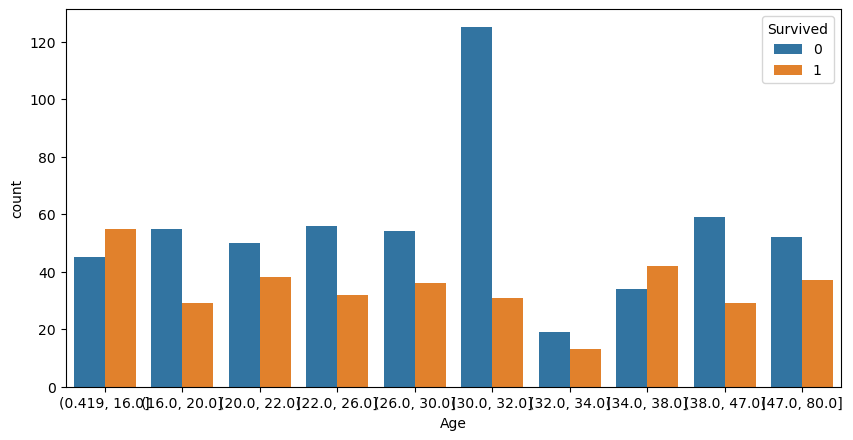

In [24]:
# Age qcut plot
plt.figure(figsize = (10,5), dpi = 100)
sns.countplot(x = pd.qcut(train_x['Age'], 10), hue = train_y)
plt.show()

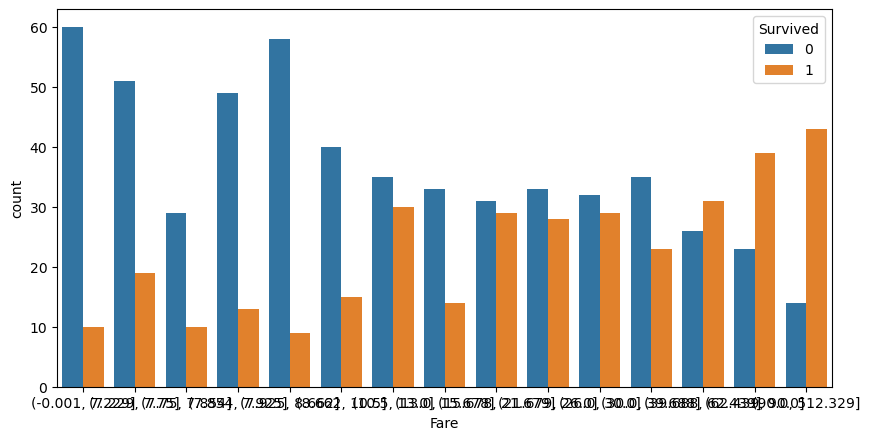

In [25]:
# Fare qcut plot
plt.figure(figsize = (10,5), dpi = 100)
sns.countplot(x = pd.qcut(train_x['Fare'], 15), hue = train_y)
plt.show()

In [26]:
# Age bin encoding
age_qcut_list = list(pd.qcut(train_x['Age'], 10).unique())
age_qcut_list.sort()

train_x['Age_bin'] = 0
for i in range(0, len(train_x)):
    for j in age_qcut_list:
        if train_x['Age'][i] in j:
            train_x['Age_bin'][i] = age_qcut_list.index(j)

test['Age_bin'] = 0
for i in range(0, len(test)):
    for j in age_qcut_list:
        if test['Age'][i] in j:
            test['Age_bin'][i] = age_qcut_list.index(j)

In [27]:
# Fare bin encoding
fare_qcut_list = list(pd.qcut(train_x['Fare'], 15).unique())
fare_qcut_list.sort()

train_x['Fare_bin'] = 0
for i in range(0, len(train_x)):
    for j in fare_qcut_list:
        if train_x['Fare'][i] in j:
            train_x['Fare_bin'][i] = fare_qcut_list.index(j)

test['Fare_bin'] = 0
for i in range(0, len(test)):
    for j in fare_qcut_list:
        if test['Fare'][i] in j:
            test['Fare_bin'][i] = fare_qcut_list.index(j)

In [28]:
train_x = train_x.drop(['Age', 'Fare'], axis = 1)
test = test.drop(['Age', 'Fare'], axis = 1)

# Target encoding

In [29]:
def target_smooth_enc(col, df_x, df_y, alhpa):
    grouped = df_y.groupby(df_x[col])
    target_mean = dict(((grouped.mean()*grouped.size()) + (df_y.mean()*alhpa))/(grouped.size() + alhpa))
    return target_mean

In [30]:
pclass_target_mean = target_smooth_enc('Pclass', train_x, train_y, 0.5)
name_target_mean = target_smooth_enc('Name', train_x, train_y, 0.5)
sex_target_mean = target_smooth_enc('Sex', train_x, train_y, 0.5)
emb_target_mean = target_smooth_enc('Embarked', train_x, train_y, 0.5)

In [31]:
train_x['Pclass'] = train_x['Pclass'].map(pclass_target_mean)
train_x['Name'] = train_x['Name'].map(name_target_mean)
train_x['Sex'] = train_x['Sex'].map(sex_target_mean)
train_x['Embarked'] = train_x['Embarked'].map(emb_target_mean) 

test['Pclass'] = test['Pclass'].map(pclass_target_mean)
test['Name'] = test['Name'].map(name_target_mean)
test['Sex'] = test['Sex'].map(sex_target_mean)
test['Embarked'] = test['Embarked'].map(emb_target_mean) 

# Correlation

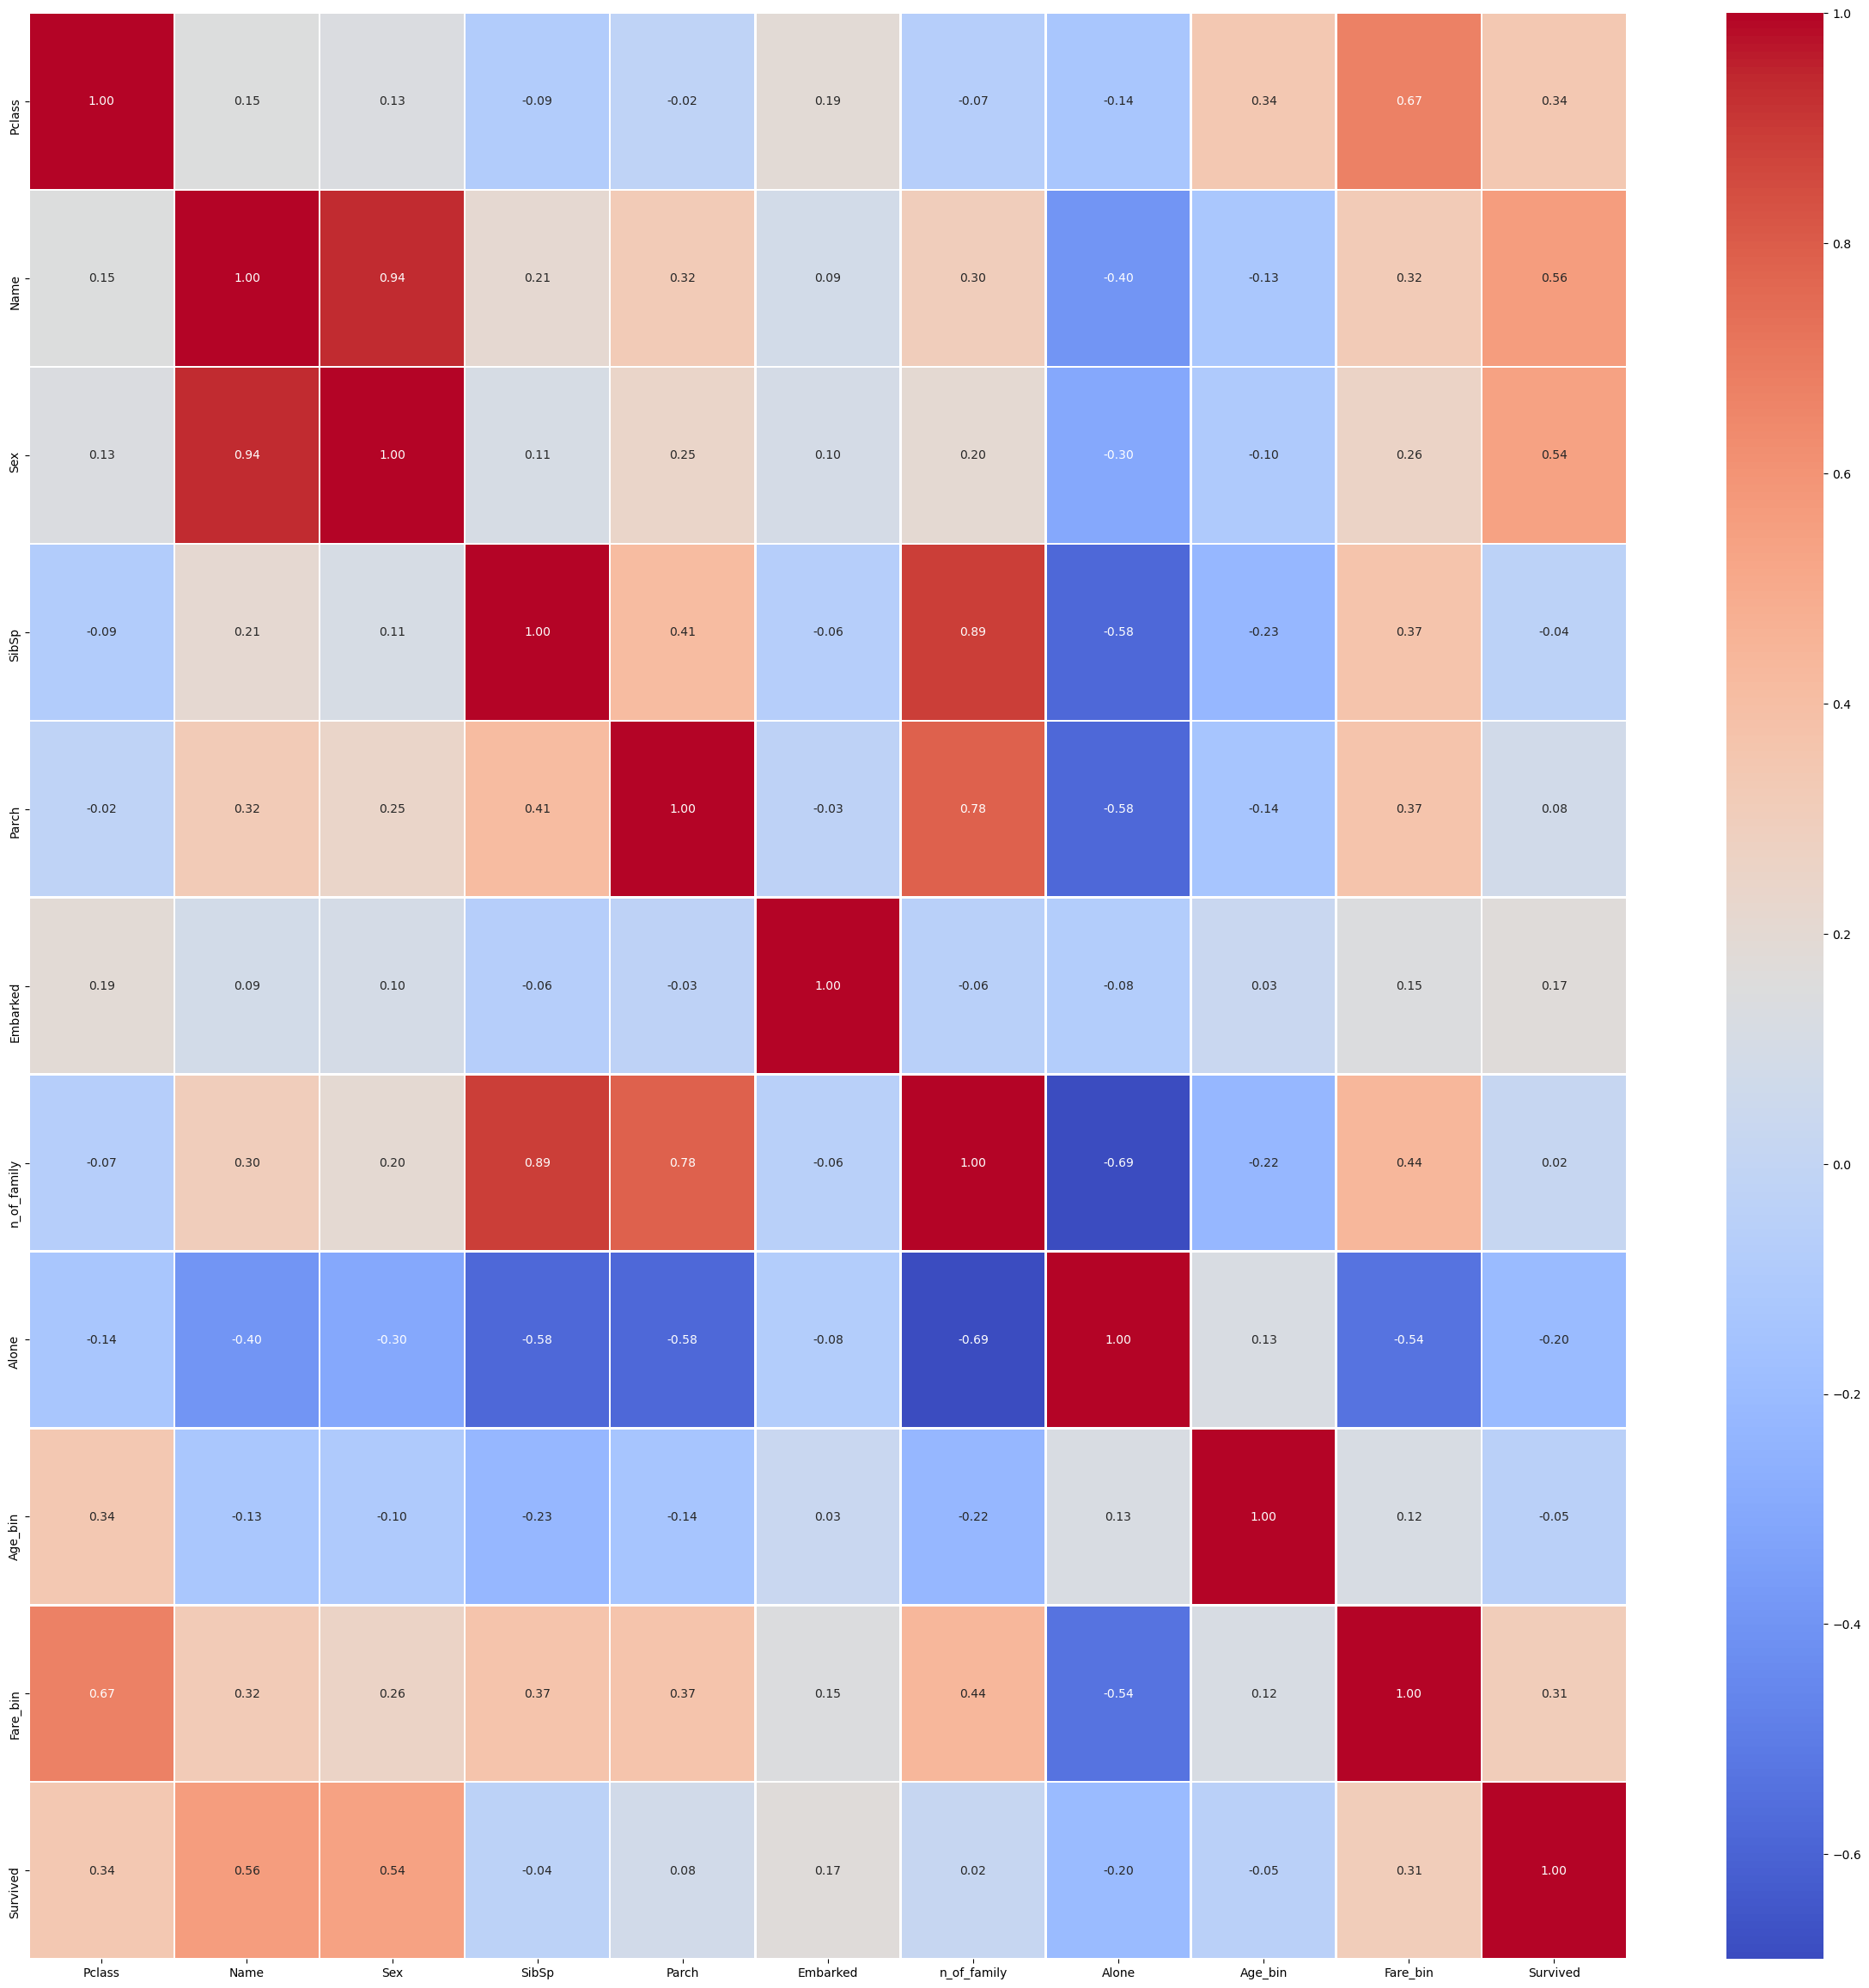

In [32]:
train_full = pd.concat([train_x, train_y], axis = 1)

plt.figure(figsize = (30,30), dpi = 100)
sns.heatmap(data = train_full.corr(), annot = True, fmt = '.2f', linewidths = 1, cmap = 'coolwarm')
plt.show()

# Modeling

In [58]:
# RandomForestRegressor
params = {'n_estimators' : [10,50,100,200,500],
          'criterion' : ['gini', 'entropy'],
         'max_depth' : [3,4,5,6,7,8,9,10],
          'class_weight' : ['balanced', 'balanced_subsample', None]
         }

rf_clf = RandomForestClassifier()
grid_rf = GridSearchCV(rf_clf, scoring = 'accuracy', param_grid = params, cv=5, refit = True)
grid_rf.fit(train_x, train_y)

print('best parameters : ', grid_rf.best_params_)
print('best score : ', grid_rf.best_score_)

best parameters :  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 500}
best score :  0.8226684133622211


In [61]:
rf_clf = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 4)
rf_clf.fit(train_x, train_y)

RandomForestClassifier(max_depth=4, n_estimators=200)

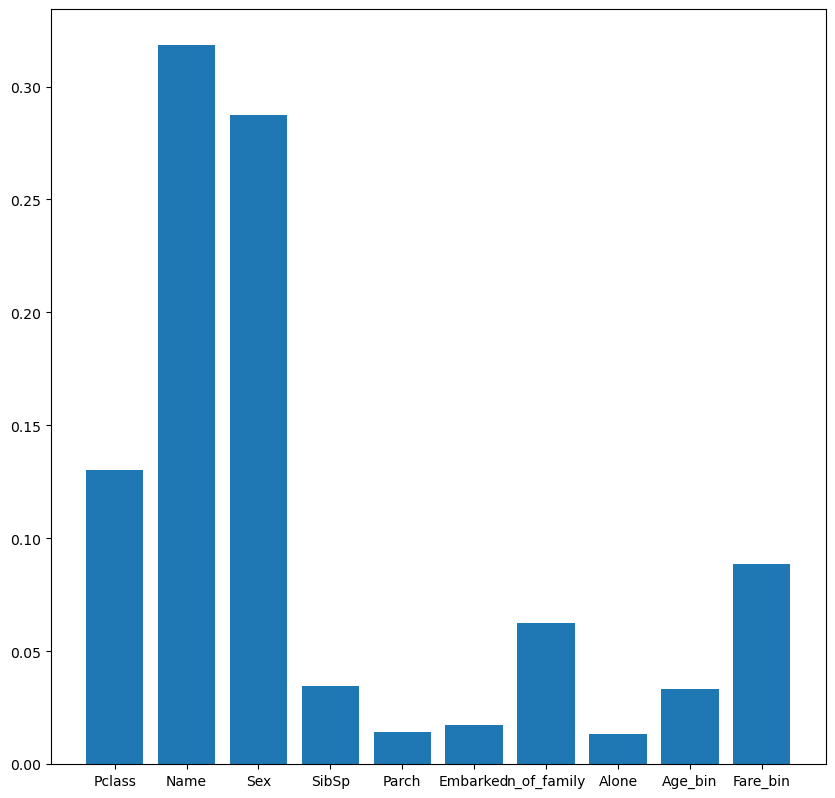

In [62]:
importances = rf_clf.feature_importances_
plt.figure(figsize = (10,10), dpi = 100)
plt.bar(train_x.columns,importances )
plt.show()

In [65]:
train_x = train_x.drop(['Parch', 'Embarked', 'Alone'], axis = 1)
test = test.drop(['Parch', 'Embarked', 'Alone'], axis = 1)

In [68]:
# RandomForestClassifier
params = {'n_estimators' : [10,50,100,200,500],
          'criterion' : ['gini', 'entropy'],
         'max_depth' : [3,4,5,6,7,8,9,10],
          'class_weight' : ['balanced', 'balanced_subsample', None]
         }

rf_clf = RandomForestClassifier()
grid_rf = GridSearchCV(rf_clf, scoring = 'accuracy', param_grid = params, cv=5, refit = True)
grid_rf.fit(train_x, train_y)

print('best parameters : ', grid_rf.best_params_)
print('best score : ', grid_rf.best_score_)

best parameters :  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}
best score :  0.832741196409516


In [69]:
rf_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 5)
rf_clf.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [70]:
pred = rf_clf.predict(test)
submission['Survived'] = 0
submission['Survived'] = pred

In [71]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
submission.to_csv('my_Titanic_submission.csv', index=False)